In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

import dataloader
import modules 
import plots
from trainer import Trainer
import torch 
import matplotlib.pyplot as plt
import numpy as np
import utilities

from matplotlib_style import setup_matplotlib_environment

In [3]:
setup_matplotlib_environment()

# Testing Model Architecture with Synthetic Linear Regression Data

In [24]:
linear_dataset_1 = dataloader.SyntheticLinearData(weights=torch.tensor([0.25, 0.5]), bias=5, noise_scale=0.05)


In [54]:
network_architecture_1 = [5]
model_1 = modules.LinearReLUMLP(network_architecture_1, learning_rate=0.02)

/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [55]:
trainer_1 = Trainer(max_epochs=10)
trainer_1.fit(model_1, linear_dataset_1)

Model running on cpu


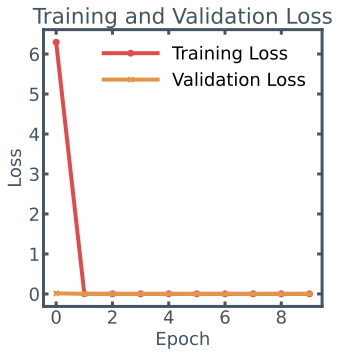

In [56]:
losses = utilities.extract_training_losses(trainer_1.metadata)
fig, ax = plots.plot_training_validation_loss(losses["avg_train_losses"], losses["avg_val_losses"])

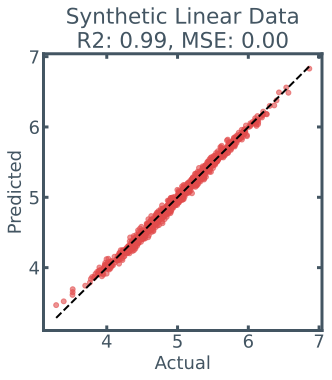

In [ ]:
fig, ax = plots.correlate_y_vs_yhat(*utilities.get_model_predictions(model_1, linear_dataset_1), title="Synthetic Linear Data")

## Testing with two input features and significant noise

When there is significant noise in our dataset, it may be tricky to fit with low error. We can make use of strong regularisation in the form of weight decay to prevent overfitting and gradient explosion/collapse. 

In [58]:
linear_dataset_2 = dataloader.SyntheticLinearData(weights=torch.tensor([0.25, 0.5]), bias=5, noise_scale=0.5)
model_2 = modules.LinearReLUMLP([5], learning_rate=0.05, weight_decay=0.005)
trainer_2 = Trainer(max_epochs=10)
trainer_2.fit(model_2, linear_dataset_2)


/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Model running on cpu


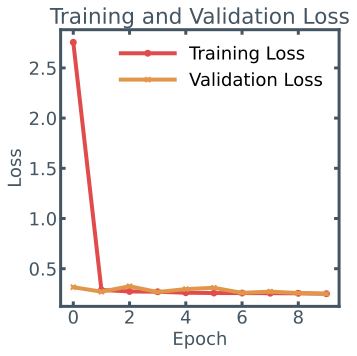

In [59]:
losses = utilities.extract_training_losses(trainer_2.metadata)
fig, ax = plots.plot_training_validation_loss(losses["avg_train_losses"], losses["avg_val_losses"])

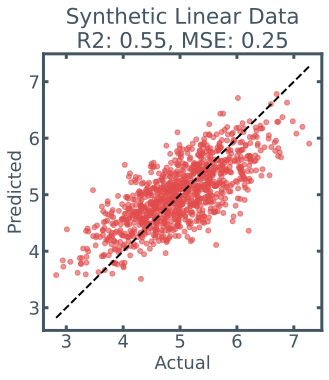

In [ ]:
fig, ax = plots.correlate_y_vs_yhat(*utilities.get_model_predictions(model_2, linear_dataset_2), title="Synthetic Linear Data")

## Testing with 50 input dimensions. 

Since these are being drawn independently from a normal distribution here, it's not actually any harder to fit the model 

In [61]:
linear_dataset_3 = dataloader.SyntheticLinearData(weights=torch.randn((50)), bias=5, noise_scale=0.1)
model_3 = modules.LinearReLUMLP([5], learning_rate=0.05, weight_decay=0.1)
trainer_3 = Trainer(max_epochs=10)
trainer_3.fit(model_3, linear_dataset_3)

/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Model running on cpu


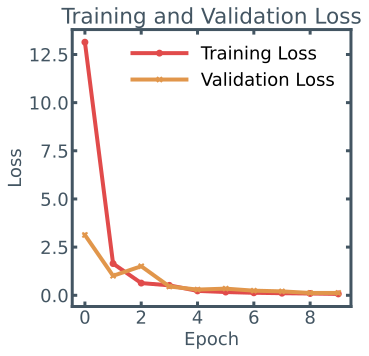

In [62]:
losses = utilities.extract_training_losses(trainer_3.metadata)
fig, ax = plots.plot_training_validation_loss(losses["avg_train_losses"], losses["avg_val_losses"])

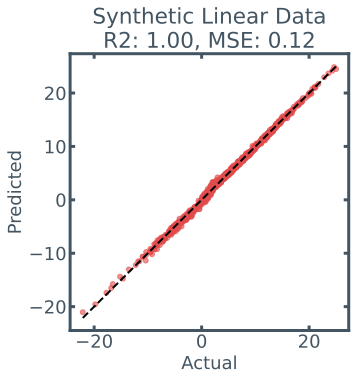

In [ ]:
fig, ax = plots.correlate_y_vs_yhat(*utilities.get_model_predictions(model_3, linear_dataset_3), title="Synthetic Linear Data")